/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


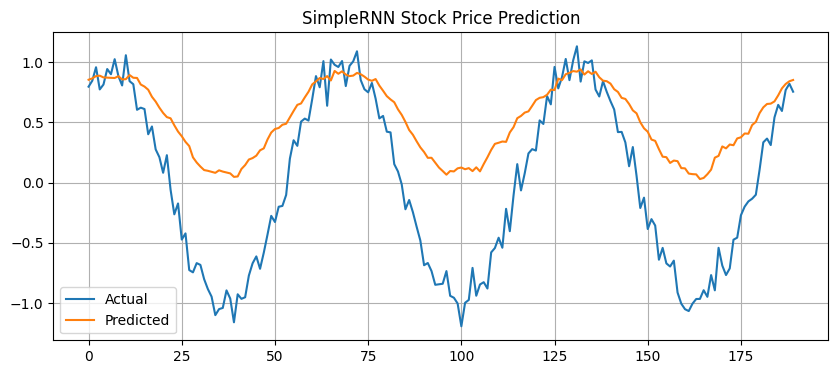

Final RNN Training Loss: 0.0027805690187960863


In [1]:
# ------------------------------------------------------------
# SimpleRNN for Time Series Prediction - Stock Price Example
# ------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# ------------------------------------------------------------
# 1. Generate Synthetic Stock Price Data
# ------------------------------------------------------------
np.random.seed(42)
time = np.arange(0, 200)
stock_price = np.sin(0.1 * time) + np.random.normal(scale=0.1, size=len(time))

# Normalize
data = (stock_price - np.min(stock_price)) / (np.max(stock_price) - np.min(stock_price))

# Create dataset (10 past values -> 1 future value)
X, y = [], []
window = 10
for i in range(len(data) - window):
    X.append(data[i:i+window])
    y.append(data[i+window])

X = np.array(X)
y = np.array(y)

# Reshape for RNN: [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# ------------------------------------------------------------
# 2. Build RNN Model
# ------------------------------------------------------------
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(X.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train
history = model.fit(X, y, epochs=20, verbose=0)

# ------------------------------------------------------------
# 3. Predictions
# ------------------------------------------------------------
predictions = model.predict(X)

# ------------------------------------------------------------
# 4. Plot results
# ------------------------------------------------------------
plt.figure(figsize=(10,4))
plt.plot(stock_price[10:], label="Actual")
plt.plot(predictions.flatten(), label="Predicted")
plt.title("SimpleRNN Stock Price Prediction")
plt.legend()
plt.grid(True)
plt.show()

print("Final RNN Training Loss:", history.history['loss'][-1])
